In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
import tqdm
from time import sleep
import time
from PIL import Image
from io import BytesIO
from adjustText import adjust_text
from scipy.interpolate import interp1d

from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name, get_teams, find_team_name_by_id
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashteamclutch import LeagueDashTeamClutch

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
clutch_current = LeagueDashTeamClutch(season='2021-22', measure_type_detailed_defense='Advanced').get_data_frames()[0]

In [6]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2000, 2022)]

In [7]:
data_frames = []

for season in seasons:
    clutch_current = LeagueDashTeamClutch(season=season, measure_type_detailed_defense='Advanced').get_data_frames()[0]
    clutch_current.loc[:, 'SEASON'] = season
    data_frames.append(clutch_current)
    time.sleep(0.5)

In [8]:
full_df = pd.concat(data_frames)

In [9]:
seasons

['2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21',
 '2021-22']

In [10]:
champions = {
    '2000-01': 'Los Angeles Lakers',
    '2001-02': 'Los Angeles Lakers',
    '2002-03': 'San Antonio Spurs',
    '2003-04': 'Detroit Pistons',
    '2004-05': 'San Antonio Spurs',
    '2005-06': 'Miami Heat',
    '2006-07': 'San Antonio Spurs',
    '2007-08': 'Boston Celtics',
    '2008-09': 'Los Angeles Lakers',
    '2009-10': 'Los Angeles Lakers',
    '2010-11': 'Dallas Mavericks',
    '2011-12': 'Miami Heat',
    '2012-13': 'Miami Heat',
    '2013-14': 'San Antonio Spurs',
    '2014-15': 'Golden State Warriors',
    '2015-16': 'Cleveland Cavaliers',
    '2016-17': 'Golden State Warriors',
    '2017-18': 'Golden State Warriors',
    '2018-19': 'Toronto Raptors',
    '2019-20': 'Los Angeles Lakers',
    '2020-21': 'Milwaukee Bucks',
}

In [11]:
champions_df = []
for key in champions:
    target_df = full_df.loc[(full_df.SEASON == key) & (full_df.TEAM_NAME == champions[key])]
    champions_df.append(target_df)

In [12]:
full_champions = pd.concat(champions_df)

In [13]:
full_df.loc[:, 'W_PCT'] = full_df.W_PCT * 100

In [14]:
champions_df = []
for key in champions:
    target_df = full_df.loc[(full_df.SEASON == key) & (full_df.TEAM_NAME == champions[key])]
    champions_df.append(target_df)

full_champions = pd.concat(champions_df)

full_champions.reset_index()

,index,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,...,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,CFID,CFPARAMS,SEASON
0,12,1610612747,Los Angeles Lakers,47,31,16,66.0,185.0,111.6,106.9,...,7,6,3,5,5,4,4,6,Los Angeles Lakers,2000-01
1,12,1610612747,Los Angeles Lakers,39,23,16,59.0,151.0,113.1,107.7,...,25,25,11,4,6,5,3,6,Los Angeles Lakers,2001-02
2,24,1610612759,San Antonio Spurs,45,29,16,64.4,169.0,111.3,106.1,...,25,26,20,2,3,23,11,6,San Antonio Spurs,2002-03
3,6,1610612765,Detroit Pistons,45,25,20,55.6,189.0,105.8,104.2,...,2,1,14,20,14,22,11,6,Detroit Pistons,2003-04
4,25,1610612759,San Antonio Spurs,32,16,16,50.0,146.0,114.8,110.8,...,28,17,16,8,9,18,18,6,San Antonio Spurs,2004-05
5,14,1610612748,Miami Heat,42,22,20,52.4,149.0,118.7,116.7,...,8,3,10,4,4,18,13,6,Miami Heat,2005-06
6,25,1610612759,San Antonio Spurs,40,20,20,50.0,136.0,108.0,105.9,...,3,5,26,6,15,22,13,6,San Antonio Spurs,2006-07
7,1,1610612738,Boston Celtics,37,24,13,64.9,144.0,105.5,102.8,...,1,7,17,21,24,24,17,6,Boston Celtics,2007-08
8,12,1610612747,Los Angeles Lakers,41,30,11,73.2,147.0,124.7,122.3,...,2,7,1,10,5,13,3,6,Los Angeles Lakers,2008-09
9,12,1610612747,Los Angeles Lakers,33,22,11,66.7,149.0,102.7,104.0,...,12,17,13,17,20,18,16,6,Los Angeles Lakers,2009-10


In [15]:
previous_seasons = full_df.loc[full_df.SEASON != '2021-22']

In [16]:
current_season = full_df.loc[full_df.SEASON == '2021-22']

In [17]:
for key in champions:
    previous_seasons = previous_seasons.loc[~((previous_seasons.SEASON == key) & (previous_seasons.TEAM_NAME == champions[key]))]

In [18]:
non_playoff_teams = [
     'Los Angeles Lakers',
     'Sacramento Kings',
     'Portland Trail Blazers',
     'Oklahoma City Thunder',
     'Houston Rockets',
     'New York Knicks',
     'Detroit Pistons',
     'Orlando Magic',
     'San Antonio Spurs',
     'Indiana Pacers',
     'Washington Wizards',
     'Charlotte Hornets',
]

In [19]:
non_po_df = current_season.loc[current_season.TEAM_NAME.isin(non_playoff_teams)]
po_df = current_season.loc[~current_season.TEAM_NAME.isin(non_playoff_teams)]

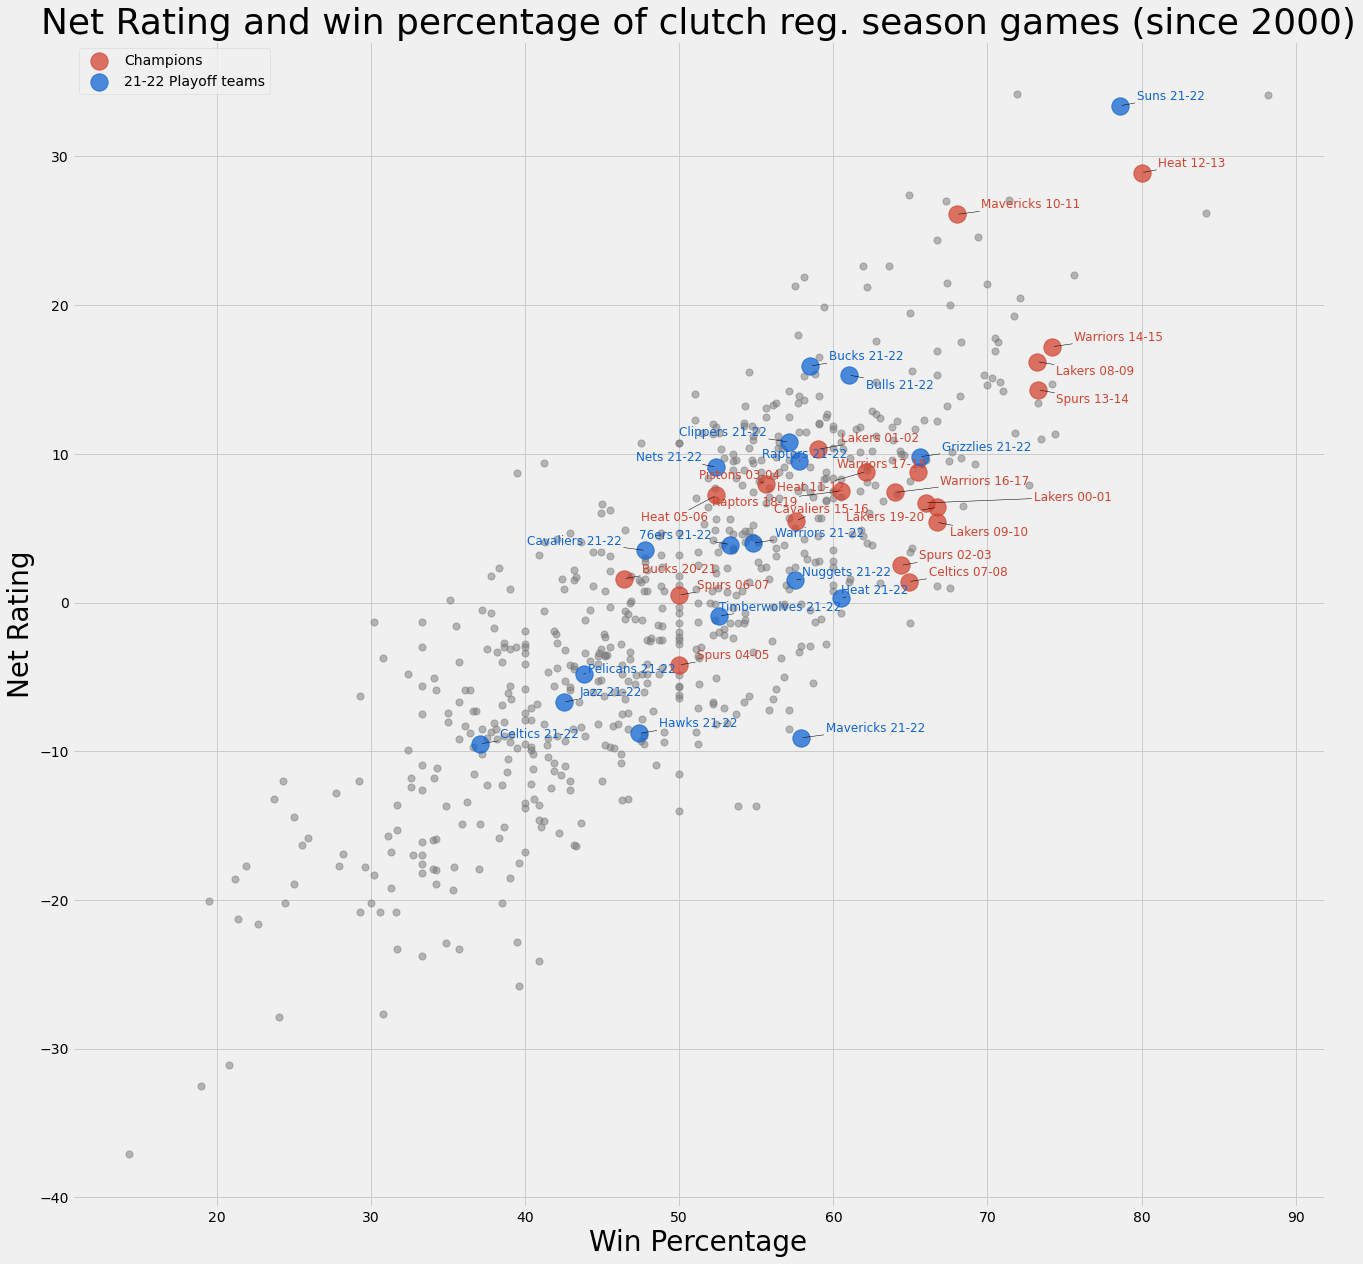

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(x=previous_seasons.W_PCT, y=previous_seasons.NET_RATING, color='#787878', alpha=0.5, lw=1, s=50)
ax.scatter(x=non_po_df.W_PCT, y=non_po_df.NET_RATING, color='#787878', alpha=0.5, lw=1, s=50)
ax.scatter(x=full_champions.W_PCT, y=full_champions.NET_RATING, color='#D24532', alpha=0.75, lw=1, s=300, label='Champions', zorder=2)
ax.scatter(x=po_df.W_PCT, y=po_df.NET_RATING, color='#1265D2', alpha=0.75, lw=1, s=300, label='21-22 Playoff teams', zorder=2)
#ax.invert_yaxis()
ax.set_title("Net Rating and win percentage of clutch reg. season games (since 2000)", size=36)
ax.set_xlabel("Win Percentage", size=28)
ax.set_ylabel("Net Rating", size=28)

texts = []
for i in range(len(full_champions)):
    row = full_champions.iloc[i]
    texts.append(ax.text(x=row.W_PCT, y=row.NET_RATING, s=f"{row.TEAM_NAME.split(' ')[-1]} {row.SEASON[2:]}", size=12, color='#D24532', zorder=3))
                         
for i in range(len(po_df)):
    row = po_df.iloc[i]
    texts.append(ax.text(x=row.W_PCT, y=row.NET_RATING, s=f"{row.TEAM_NAME.split(' ')[-1]} {row.SEASON[2:]}", size=12, color='#1265D2', zorder=3))
                         
adjust_text(texts, expand_points=(1.5, 1.5), arrowprops={'arrowstyle': '-', 'lw': 0.5, 'color': 'black'})
ax.legend(loc='upper left')

In [23]:
full_df.sort_values(by='NET_RATING', ascending=False)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,CFID,CFPARAMS,SEASON
4,1610612739,Cleveland Cavaliers,32,23,9,71.9,121.0,134.9,127.0,95.0,...,8,6,4,1,1,18,1,6,Cleveland Cavaliers,2008-09
9,1610612744,Golden State Warriors,34,30,4,88.2,144.0,122.4,118.7,83.8,...,12,2,19,1,1,15,1,6,Golden State Warriors,2015-16
23,1610612756,Phoenix Suns,42,33,9,78.6,130.0,135.1,131.6,98.2,...,13,2,7,1,1,3,1,6,Phoenix Suns,2021-22
15,1610612748,Miami Heat,40,32,8,80.0,176.0,120.2,118.3,87.6,...,2,2,4,1,2,26,1,6,Miami Heat,2012-13
24,1610612757,Portland Trail Blazers,37,24,13,64.9,137.0,128.5,126.7,103.7,...,7,6,1,3,5,13,2,6,Portland Trail Blazers,2020-21
10,1610612745,Houston Rockets,35,25,10,71.4,107.0,126.2,124.9,103.4,...,4,8,1,5,3,24,2,6,Houston Rockets,2017-18
14,1610612763,Memphis Grizzlies,49,33,16,67.3,167.0,114.2,111.4,88.0,...,3,2,11,6,6,22,1,6,Memphis Grizzlies,2013-14
5,1610612742,Dallas Mavericks,38,32,6,84.2,154.0,116.5,112.6,87.5,...,4,3,8,13,8,15,1,6,Dallas Mavericks,2006-07
5,1610612742,Dallas Mavericks,50,34,16,68.0,156.0,123.2,117.2,95.3,...,3,1,25,1,1,12,1,6,Dallas Mavericks,2010-11
4,1610612739,Cleveland Cavaliers,49,34,15,69.4,167.0,122.1,120.0,95.7,...,2,7,3,2,3,7,1,6,Cleveland Cavaliers,2009-10
